In [91]:
# importing lib
import pandas as pd 
import numpy as np 
import seaborn as sns

In [92]:
df = pd.read_csv("auto_ru_res_test-Copy1.csv")
df.drop('url', axis=1, inplace=True)

In [93]:
df.isnull().sum()

car_mark           0
Цена               0
Год                0
Пробег             0
Двигатель          0
Привод             0
Кузов              0
Цвет               0
Коробка передач    0
brand              0
dtype: int64

In [94]:
df['Цена'] = df['Цена'].str.replace('₽', '').str.replace('от ', '').str.replace('\xa0', '').astype(int)
df.rename(columns={'Цена': 'Цена, ₽'},inplace=True)
df['Пробег'] = df['Пробег'].str.replace('км', '').str.replace('\xa0', '').str.replace('Новый', '0').astype(int)
df.rename(columns={'Пробег': 'Пробег, км'}, inplace=True)

In [95]:
df

,car_mark,"Цена, ₽",Год,"Пробег, км",Двигатель,Привод,Кузов,Цвет,Коробка передач,brand
0,Acura MDX III,2450000,2014,219000,3.5 л / 290 л.с. / Бензин,полный,внедорожник 5 дв.,серый,автомат,Acura
1,Acura Integra III,1000000,1994,40000,1.8 л / 170 л.с. / Бензин,передний,купе,жёлтый,механика,Acura
2,Acura RDX III,3190000,2019,7000,2.0 л / 272 л.с. / Бензин,полный,внедорожник 5 дв.,серый,автомат,Acura
3,Acura MDX II,1050000,2006,220000,3.7 л / 300 л.с. / Бензин,полный,внедорожник 5 дв.,чёрный,автомат,Acura
4,Acura MDX III,3549807,2014,90500,3.5 л / 290 л.с. / Бензин,полный,внедорожник 5 дв.,чёрный,автомат,Acura
...,...,...,...,...,...,...,...,...,...,...
76084,УАЗ 3151 31519,190000,2001,200000,2.9 л / 84 л.с. / Бензин,полный,внедорожник 5 дв.,зелёный,механика,УАЗ
76085,УАЗ Hunter 315195,369000,2008,77000,2.7 л / 128 л.с. / Бензин,полный,внедорожник 5 дв.,чёрный,механика,УАЗ
76086,УАЗ 3151 31519,250000,2005,89000,2.9 л / 84 л.с. / Бензин,полный,внедорожник 5 дв.,серый,механика,УАЗ
76087,УАЗ Pickup I Рестайлинг 2,950000,2019,300000,2.7 л / 150 л.с. / Бензин,полный,пикап двойная кабина,белый,механика,УАЗ


In [110]:
# У двигателя есть объем мощность и тип
s = df['Двигатель']
s = pd.DataFrame(s.str.split('/', expand=True).values, columns=['Объем', 'Мощность', 'Тип'])

s['Объем'] = s['Объем'].str.replace(' л\u2009', '')
s['Объем']

0        3.5
1        1.8
2        2.0
3        3.7
4        3.5
        ... 
76084    2.9
76085    2.7
76086    2.9
76087    2.7
76088    2.7
Name: Объем, Length: 76089, dtype: object

In [97]:
df_num = df.select_dtypes(include=np.number)

<AxesSubplot:>

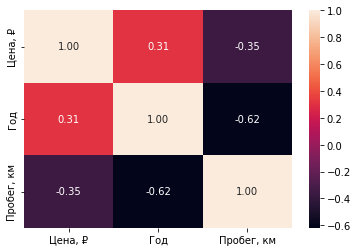

In [99]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')